# Large cap Equity MFs analysis

## Funds included in analysis

- ABSL Focused Equity
- Axis Bluechip
- Canar Robeco Bluechip
- Edelweiss Large Cap
- HDFC Nifty 50
- HDFC Sensex
- ICICI Bluechip
- Kotak Bluechip
- Mirae Bluechip
- Motilal Oswal Focused Equity
- Nippon Sensex
- PGIM Large Cap
- Quant Focused
- SBI Bluechip
- UTI Nifty
- UTI Nifty Next 50

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns

In [2]:
sns.set()
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
[file for file in os.listdir('data/Equity_LargeCap/') if file.endswith('.csv')]

['ABSLFocusedGrowthDirect.csv',
 'AxisBluechipGrowthDirect.csv',
 'CanaraRobecoBluechipGrowthDirect.csv',
 'EdelweissLargeCapGrowthDirect.csv',
 'HDFCNifty50GrowthDirect.csv',
 'HDFCSensexGrowthDirect.csv',
 'ICICIBluechipGrowthDirect.csv',
 'KotakBluechipGrowthDirect.csv',
 'MiraeBluechipGrowthDirect.csv',
 'MOFocusedGrowthDirect.csv',
 'NipponSensexGrowthDirect.csv',
 'PGIMLargeCapGrowthDirect.csv',
 'QuantFocusedGrowthDirect.csv',
 'SBIBluechipGrowthDirect.csv',
 'UTINiftyGrowthDirect.csv',
 'UTINiftyNext50GrowthDirect.csv']

In [10]:
large_cap_funds_csv_files = ['ABSLFocusedGrowthDirect.csv',
 'AxisBluechipGrowthDirect.csv',
 'CanaraRobecoBluechipGrowthDirect.csv',
 'EdelweissLargeCapGrowthDirect.csv',
 'HDFCNifty50GrowthDirect.csv',
 'HDFCSensexGrowthDirect.csv',
 'ICICIBluechipGrowthDirect.csv',
 'KotakBluechipGrowthDirect.csv',
 'MiraeBluechipGrowthDirect.csv',
 'MOFocusedGrowthDirect.csv',
 'NipponSensexGrowthDirect.csv',
 'PGIMLargeCapGrowthDirect.csv',
 'QuantFocusedGrowthDirect.csv',
 'SBIBluechipGrowthDirect.csv',
 'UTINiftyGrowthDirect.csv',
 'UTINiftyNext50GrowthDirect.csv']

large_cap_fund_names = [
    'ABSLFocusedEquity', 
    'AxisBluechip', 
    'CanaraBluechip', 
    'EdelweissLargeCap', 
    'HDFCNifty50', 
    'HDFCSensex', 
    'ICICIBluechip', 
    'KotakBluechip',
    'MiraeBluechip',
    'MOFocusedEquity',
    'NipponSensex',
    'PGIMLargeCap',
    'QuantFocusedEquity',
    'SBIBluechip',
    'UTINifty50',
    'UTINiftyNext50'
]



def read_fund_info(file_name, fund_name, start_date, end_date):
    df = pd.read_csv(file_name, skiprows=4)
    df = df[['NAV date', 'Net Asset Value']]
    df['NAV date'] = pd.to_datetime(df['NAV date'], infer_datetime_format=True)
    df.columns = ['date', f'{fund_name}_NAV']
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df = df.dropna()
    return df

def calculate_rolling_returns(df, fund_name, num_years, num_trading_days):
    for num_year in num_years:
        df[f'{fund_name}_{num_year}Y_rolling_ret'] = df[f'{fund_name}_NAV'].pct_change(periods=num_trading_days * num_year)
        df[f'{fund_name}_{num_year}Y_rolling_ret'] = ((df[f'{fund_name}_{num_year}Y_rolling_ret'] + 1) ** (1/num_year)) - 1
    
    return df

In [16]:
large_cap_funds_1Y_ret_mean = []
large_cap_funds_1Y_ret_std = []
large_cap_funds_3Y_ret_mean = []
large_cap_funds_3Y_ret_std = []
large_cap_funds_5Y_ret_mean = []
large_cap_funds_5Y_ret_std = []

large_cap_funds_dfs = {}

for file_name, fund_name in zip(large_cap_funds_csv_files, large_cap_fund_names):
    print(f'Reading {file_name} ...')
    start_date = pd.Timestamp('2013-01-01')
    end_date = pd.Timestamp('2021-12-31')
    large_cap_fund_df = read_fund_info(f'data/Equity_LargeCap/{file_name}', fund_name, start_date, end_date)
    num_years = [1,3,5]
    num_trading_days = 250
    large_cap_fund_df = large_cap_fund_df.pipe(calculate_rolling_returns, fund_name, num_years, num_trading_days)
    large_cap_fund_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    large_cap_fund_1Y_ret_mean = large_cap_fund_df[f'{fund_name}_1Y_rolling_ret'].mean()
    large_cap_fund_3Y_ret_mean = large_cap_fund_df[f'{fund_name}_3Y_rolling_ret'].mean()
    large_cap_fund_5Y_ret_mean = large_cap_fund_df[f'{fund_name}_5Y_rolling_ret'].mean()
    large_cap_fund_1Y_ret_std = large_cap_fund_df[f'{fund_name}_1Y_rolling_ret'].std()
    large_cap_fund_3Y_ret_std = large_cap_fund_df[f'{fund_name}_3Y_rolling_ret'].std()
    large_cap_fund_5Y_ret_std = large_cap_fund_df[f'{fund_name}_5Y_rolling_ret'].std()
    large_cap_funds_1Y_ret_mean.append(large_cap_fund_1Y_ret_mean)
    large_cap_funds_3Y_ret_mean.append(large_cap_fund_3Y_ret_mean)
    large_cap_funds_5Y_ret_mean.append(large_cap_fund_5Y_ret_mean)
    large_cap_funds_1Y_ret_std.append(large_cap_fund_1Y_ret_std)
    large_cap_funds_3Y_ret_std.append(large_cap_fund_3Y_ret_std)
    large_cap_funds_5Y_ret_std.append(large_cap_fund_5Y_ret_std)
    
    large_cap_funds_dfs[fund_name] = large_cap_fund_df
    print('Done')

Reading ABSLFocusedGrowthDirect.csv ...
Done
Reading AxisBluechipGrowthDirect.csv ...
Done
Reading CanaraRobecoBluechipGrowthDirect.csv ...
Done
Reading EdelweissLargeCapGrowthDirect.csv ...
Done
Reading HDFCNifty50GrowthDirect.csv ...
Done
Reading HDFCSensexGrowthDirect.csv ...
Done
Reading ICICIBluechipGrowthDirect.csv ...
Done
Reading KotakBluechipGrowthDirect.csv ...
Done
Reading MiraeBluechipGrowthDirect.csv ...
Done
Reading MOFocusedGrowthDirect.csv ...
Done
Reading NipponSensexGrowthDirect.csv ...
Done
Reading PGIMLargeCapGrowthDirect.csv ...
Done
Reading QuantFocusedGrowthDirect.csv ...
Done
Reading SBIBluechipGrowthDirect.csv ...
Done
Reading UTINiftyGrowthDirect.csv ...
Done
Reading UTINiftyNext50GrowthDirect.csv ...
Done


## 1,3 and 5 years rolling returns comparison for different large cap funds

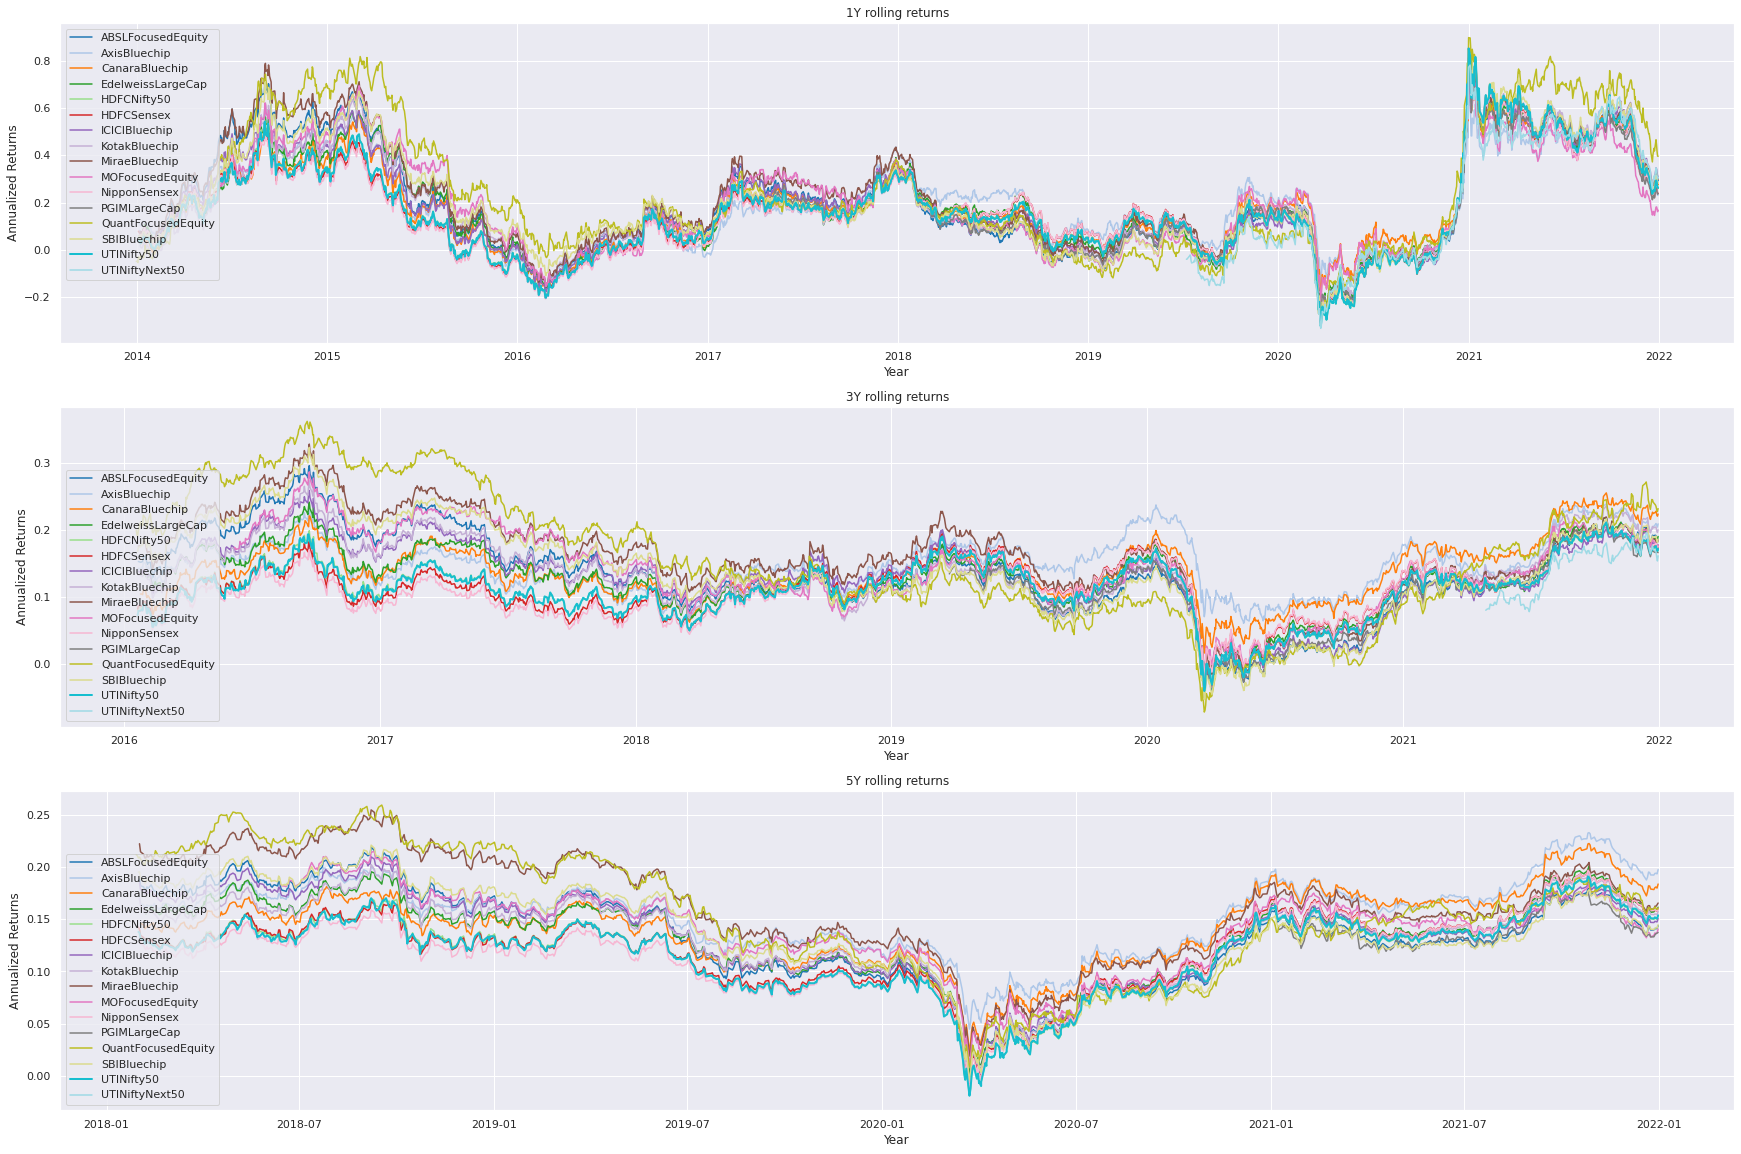

In [25]:
num_years = [1,3,5]
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

colors = pl.cm.tab20(np.linspace(0,1,len(large_cap_fund_names)))

for i , num_year in enumerate(num_years): 
    for j, fund_name in enumerate(large_cap_fund_names):
        if(fund_name == 'UTINifty50'):
            ax[i].plot(large_cap_funds_dfs[fund_name]['date'], large_cap_funds_dfs[fund_name][f'{fund_name}_{num_year}Y_rolling_ret'], color=colors[j], linewidth=2)
        else:
            ax[i].plot(large_cap_funds_dfs[fund_name]['date'], large_cap_funds_dfs[fund_name][f'{fund_name}_{num_year}Y_rolling_ret'], color=colors[j])
        ax[i].set_title(f'{num_year}Y rolling returns')
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('Annualized Returns')
        ax[i].legend(large_cap_fund_names, loc='best')
plt.savefig('plots/LargeCapFundsComparison.png', dpi=300)

In [38]:
large_cap_funds_comparison = pd.DataFrame(data={
    'fund_name': large_cap_fund_names,
    '1Y_ret_mean': large_cap_funds_1Y_ret_mean,
    '3Y_ret_mean': large_cap_funds_3Y_ret_mean,
    '5Y_ret_mean': large_cap_funds_5Y_ret_mean,
    '1Y_ret_std': large_cap_funds_1Y_ret_std,
    '3Y_ret_std': large_cap_funds_3Y_ret_std,
    '5Y_ret_std': large_cap_funds_5Y_ret_std
})

large_cap_funds_comparison.set_index('fund_name', inplace=True)
large_cap_funds_comparison.drop(['PGIMLargeCap', 'UTINiftyNext50'], inplace=True)

In [39]:
large_cap_funds_comparison

,1Y_ret_mean,3Y_ret_mean,5Y_ret_mean,1Y_ret_std,3Y_ret_std,5Y_ret_std
fund_name,,,,,,
ABSLFocusedEquity,0.188776,0.128118,0.128561,0.222868,0.069105,0.048882
AxisBluechip,0.188959,0.146032,0.150880,0.179025,0.040271,0.038235
CanaraBluechip,0.182141,0.135857,0.138596,0.183719,0.045942,0.039056
EdelweissLargeCap,0.176249,0.124055,0.127908,0.202200,0.050100,0.044762
HDFCNifty50,0.158490,0.108385,0.113558,0.205636,0.047086,0.042234
HDFCSensex,0.159095,0.111794,0.117534,0.197834,0.044368,0.041238
ICICIBluechip,0.181517,0.126461,0.130298,0.213614,0.059178,0.046218
KotakBluechip,0.182535,0.127126,0.127514,0.212883,0.060544,0.044282
MiraeBluechip,0.215786,0.155702,0.158315,0.230541,0.070580,0.052290


## Risk vs Return analysis
Note that higher standard deviation means higher volatility in returns and therefore higher risk. We should typically look at the funds on the lower right part of the plot(higher returns with lower risk).

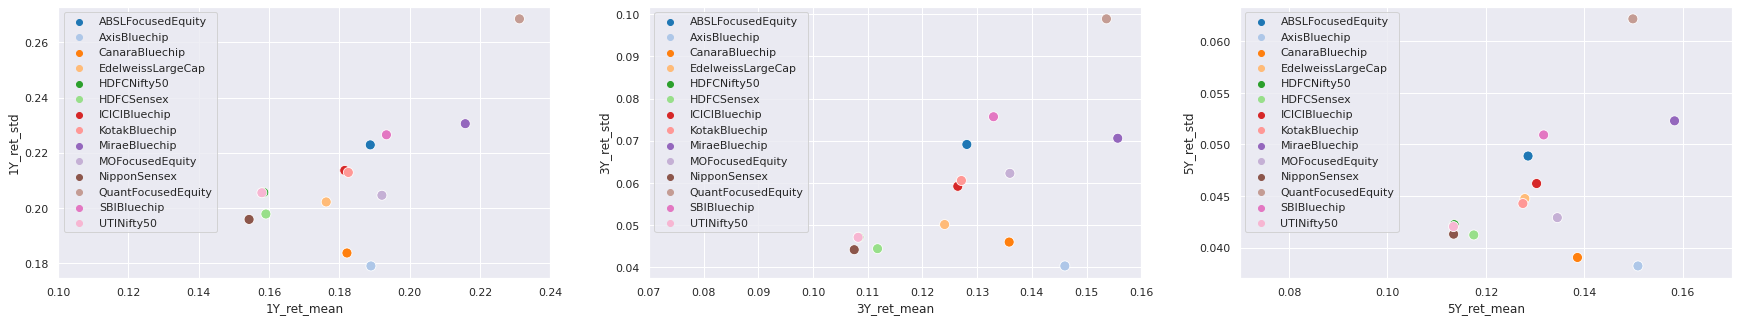

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

ax[0].set(xlim=(0.1, 0.24))
sns.scatterplot(data=large_cap_funds_comparison, x='1Y_ret_mean', y='1Y_ret_std', hue='fund_name', ax=ax[0], s=100, palette='tab20')
ax[0].legend(loc='upper left')

ax[1].set(xlim=(0.07, 0.16))
sns.scatterplot(data=large_cap_funds_comparison, x='3Y_ret_mean', y='3Y_ret_std', hue='fund_name', ax=ax[1], s=100, palette='tab20')
ax[1].legend(loc='upper left')

ax[2].set(xlim=(0.07, 0.17))
sns.scatterplot(data=large_cap_funds_comparison, x='5Y_ret_mean', y='5Y_ret_std', hue='fund_name', ax=ax[2], s=100, palette='tab20')
ax[2].legend(loc='upper left')

plt.show()